### Image Quantization

Normal RGB image representation (with 8 bit depth per channel) yields more than 16 millions combinations (different colours). Is that many really necessary? Let's have a look.

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

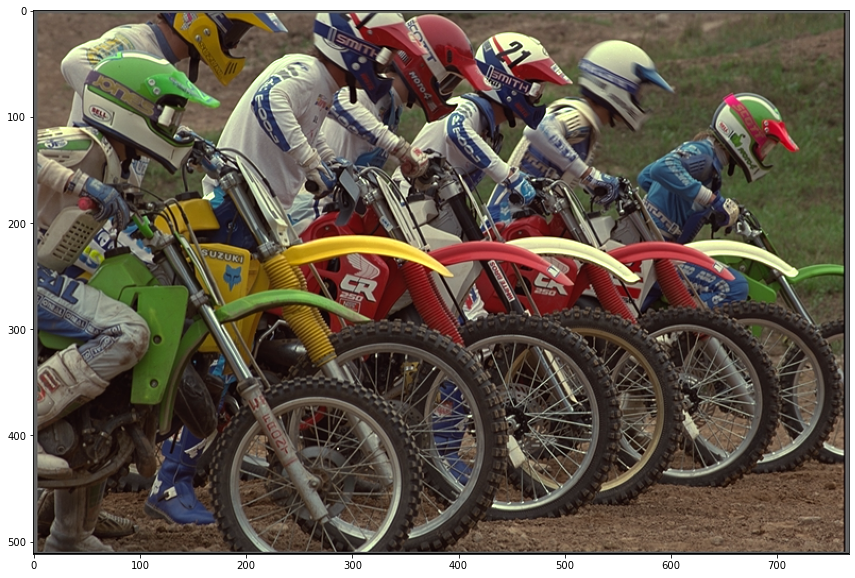

In [2]:
img = cv2.imread('data/kodim05.png') # kodim02
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Let us now count the different colours in the picture.

In [ ]:
from tqdm import tqdm

rows, cols, channels = img.shape
colors = []

for r in tqdm(range(rows)):
    for c in range(cols):
        pixel = list(img[r, c, :])
        if pixel not in colors:
            colors.append(pixel)
            
print(rows*cols, len(color))

In [ ]:
# Let's count the different colours in a celever way :-)
pixels = np.reshape(img, (-1, 3))
pixels = [tuple(p) for p in pixels]
print('Number of pixels', rows*cols, len(pixels))

In [ ]:
from collections import Counter
colors = Counter(pixels)
colors

In [ ]:
print('Number of pixels', rows*cols)
print('Number of colors', len(colors))
print('Ratio of colors ', len(colors)/2**24)

### Uniform Quantization

Instead of using 255 (8 bits) different levels for **each** of the colour channels, let's use a coarser resolution, e.g., [0, 4, 8, 12, ...]

In [ ]:
quantized = np.copy(img)
step = 16

# Since we know for loops are slow in python, let's make use of numy power :-)
quantized = (np.floor(quantized/step)*step).astype(np.uint8)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(quantized)

print('Quantized image is', step, 'times smaller.')
print('Original color pallette:', 2**24)
print('Original color pallette:', (2**24)//16)

In [ ]:
plt.imshow(quantized)